In [1]:
!nvidia-smi

Mon Jun  3 21:54:13 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

plt.ion()   # interactive mode

In [9]:
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz

--2019-06-03 12:15:17--  https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.110.13
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.110.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344873452 (329M) [application/x-gzip]
flower_data.tar.gz.1: Permission denied

Cannot write to ‘flower_data.tar.gz.1’ (Permission denied).


In [2]:
!ls

CUB_200_2011	  flower_data.tar.gz		   setup.sh	 valid
CUB_200_2011.tgz  iNat_2018_InceptionV3.pth.tar    stanforddogs
Untitled.ipynb	  iNat_2018_InceptionV3.pth.tar.1  test
attributes.txt	  jupyter.sh			   train


In [5]:
!tar -zxvf flower_data.tar.gz

train/
train/101/
train/101/image_07994.jpg
train/101/image_07960.jpg
train/101/image_07947.jpg
train/101/image_07993.jpg
train/101/image_07945.jpg
train/101/image_07973.jpg
train/101/image_07972.jpg
train/101/image_07991.jpg
train/101/image_07977.jpg
train/101/image_07982.jpg
train/101/image_07948.jpg
train/101/image_07969.jpg
train/101/image_07966.jpg
train/101/image_07957.jpg
train/101/image_07979.jpg
train/101/image_07989.jpg
train/101/image_07974.jpg
train/101/image_07961.jpg
train/101/image_07956.jpg
train/101/image_07998.jpg
train/101/image_07990.jpg
train/101/image_07968.jpg
train/101/image_07986.jpg
train/101/image_07967.jpg
train/101/image_07955.jpg
train/101/image_07978.jpg
train/101/image_07944.jpg
train/101/image_07995.jpg
train/101/image_07958.jpg
train/101/image_07981.jpg
train/101/image_07959.jpg
train/101/image_07943.jpg
train/101/image_07980.jpg
train/101/image_07987.jpg
train/101/image_07954.jpg
train/101/image_07965.jpg
train/101/image_07964.jpg
train/101/image_0797

train/71/image_04508.jpg
train/71/image_04546.jpg
train/71/image_04549.jpg
train/71/image_04483.jpg
train/71/image_04530.jpg
train/71/image_04484.jpg
train/71/image_04501.jpg
train/71/image_04544.jpg
train/71/image_04481.jpg
train/71/image_04538.jpg
train/71/image_04543.jpg
train/71/image_04522.jpg
train/71/image_04510.jpg
train/71/image_04534.jpg
train/71/image_04529.jpg
train/71/image_04540.jpg
train/71/image_04503.jpg
train/71/image_04552.jpg
train/71/image_04542.jpg
train/71/image_04556.jpg
train/71/image_04541.jpg
train/71/image_08089.jpg
train/71/image_04511.jpg
train/71/image_04506.jpg
train/71/image_04509.jpg
train/71/image_04548.jpg
train/71/image_04490.jpg
train/71/image_04494.jpg
train/71/image_04545.jpg
train/71/image_04497.jpg
train/71/image_04489.jpg
train/71/image_04527.jpg
train/71/image_04535.jpg
train/71/image_04495.jpg
train/71/image_04520.jpg
train/71/image_04521.jpg
train/71/image_04496.jpg
train/71/image_04532.jpg
train/71/image_04533.jpg
train/71/image_04547.jpg


train/92/image_03071.jpg
train/92/image_03051.jpg
train/92/image_03081.jpg
train/92/image_03042.jpg
train/92/image_03067.jpg
train/92/image_03059.jpg
train/92/image_03092.jpg
train/92/image_03085.jpg
train/92/image_03043.jpg
train/92/image_03034.jpg
train/92/image_03064.jpg
train/92/image_03079.jpg
train/92/image_03076.jpg
train/92/image_03031.jpg
train/84/
train/84/image_02595.jpg
train/84/image_02630.jpg
train/84/image_02625.jpg
train/84/image_02607.jpg
train/84/image_02638.jpg
train/84/image_02599.jpg
train/84/image_02577.jpg
train/84/image_02592.jpg
train/84/image_02609.jpg
train/84/image_02556.jpg
train/84/image_02614.jpg
train/84/image_02560.jpg
train/84/image_02620.jpg
train/84/image_02633.jpg
train/84/image_02558.jpg
train/84/image_02554.jpg
train/84/image_02603.jpg
train/84/image_02593.jpg
train/84/image_02616.jpg
train/84/image_02578.jpg
train/84/image_02571.jpg
train/84/image_02626.jpg
train/84/image_02553.jpg
train/84/image_02606.jpg
train/84/image_02564.jpg
train/84/image_

train/76/image_02447.jpg
train/76/image_02510.jpg
train/76/image_02526.jpg
train/76/image_02449.jpg
train/76/image_02503.jpg
train/76/image_02462.jpg
train/76/image_02483.jpg
train/76/image_02486.jpg
train/76/image_02489.jpg
train/76/image_02534.jpg
train/76/image_02542.jpg
train/76/image_02540.jpg
train/76/image_02543.jpg
train/76/image_02518.jpg
train/76/image_02469.jpg
train/76/image_02487.jpg
train/76/image_02460.jpg
train/76/image_02465.jpg
train/76/image_02505.jpg
train/76/image_02497.jpg
train/76/image_02527.jpg
train/76/image_02515.jpg
train/76/image_02502.jpg
train/76/image_02471.jpg
train/76/image_02539.jpg
train/76/image_02551.jpg
train/76/image_02507.jpg
train/76/image_02468.jpg
train/76/image_02480.jpg
train/76/image_02498.jpg
train/76/image_02535.jpg
train/76/image_02528.jpg
train/76/image_02463.jpg
train/76/image_02495.jpg
train/76/image_02459.jpg
train/76/image_02522.jpg
train/76/image_02448.jpg
train/76/image_02490.jpg
train/76/image_02536.jpg
train/76/image_02549.jpg


train/43/image_02379.jpg
train/43/image_02366.jpg
train/43/image_02331.jpg
train/43/image_02442.jpg
train/43/image_02406.jpg
train/43/image_02405.jpg
train/43/image_02381.jpg
train/43/image_02322.jpg
train/43/image_02403.jpg
train/43/image_02339.jpg
train/43/image_02396.jpg
train/43/image_02440.jpg
train/43/image_02420.jpg
train/43/image_02353.jpg
train/43/image_02316.jpg
train/43/image_02325.jpg
train/43/image_02361.jpg
train/43/image_02321.jpg
train/43/image_02364.jpg
train/43/image_02334.jpg
train/43/image_02409.jpg
train/43/image_02357.jpg
train/43/image_02324.jpg
train/43/image_02444.jpg
train/43/image_02387.jpg
train/43/image_02323.jpg
train/43/image_02413.jpg
train/43/image_02380.jpg
train/43/image_02417.jpg
train/43/image_02427.jpg
train/43/image_02351.jpg
train/43/image_02416.jpg
train/43/image_02437.jpg
train/43/image_02439.jpg
train/43/image_02326.jpg
train/43/image_02348.jpg
train/43/image_02384.jpg
train/43/image_02395.jpg
train/43/image_02332.jpg
train/43/image_02445.jpg


train/13/image_05766.jpg
train/13/image_05747.jpg
train/13/image_05758.jpg
train/13/image_05750.jpg
train/13/image_05764.jpg
train/13/image_05791.jpg
train/13/image_05754.jpg
train/13/image_05790.jpg
train/13/image_05778.jpg
train/13/image_05773.jpg
train/13/image_05768.jpg
train/13/image_05756.jpg
train/13/image_05753.jpg
train/13/image_05752.jpg
train/13/image_05785.jpg
train/13/image_05781.jpg
train/13/image_05751.jpg
train/13/image_05762.jpg
train/13/image_05771.jpg
train/13/image_05760.jpg
train/13/image_05779.jpg
train/13/image_05774.jpg
train/13/image_05784.jpg
train/13/image_05789.jpg
train/72/
train/72/image_03581.jpg
train/72/image_03563.jpg
train/72/image_03597.jpg
train/72/image_03550.jpg
train/72/image_03572.jpg
train/72/image_03555.jpg
train/72/image_03560.jpg
train/72/image_03618.jpg
train/72/image_03566.jpg
train/72/image_03600.jpg
train/72/image_03558.jpg
train/72/image_03590.jpg
train/72/image_03574.jpg
train/72/image_03595.jpg
train/72/image_03615.jpg
train/72/image_

train/12/image_04063.jpg
train/12/image_04024.jpg
train/12/image_04019.jpg
train/12/image_04002.jpg
train/12/image_04065.jpg
train/12/image_04010.jpg
train/12/image_04050.jpg
train/12/image_04046.jpg
train/12/image_04047.jpg
train/12/image_04064.jpg
train/12/image_04030.jpg
train/12/image_04062.jpg
train/12/image_04068.jpg
train/12/image_04034.jpg
train/12/image_04074.jpg
train/12/image_04073.jpg
train/12/image_04022.jpg
train/12/image_04044.jpg
train/12/image_04071.jpg
train/12/image_04027.jpg
train/12/image_04000.jpg
train/12/image_04032.jpg
train/12/image_04033.jpg
train/12/image_04020.jpg
train/12/image_04051.jpg
train/12/image_04043.jpg
train/12/image_04060.jpg
train/12/image_04057.jpg
train/12/image_04056.jpg
train/12/image_04040.jpg
train/12/image_04066.jpg
train/12/image_04029.jpg
train/12/image_04075.jpg
train/12/image_04078.jpg
train/12/image_04018.jpg
train/12/image_04041.jpg
train/12/image_04017.jpg
train/12/image_04069.jpg
train/12/image_03999.jpg
train/12/image_04007.jpg


train/53/image_03727.jpg
train/53/image_03697.jpg
train/53/image_03692.jpg
train/53/image_03721.jpg
train/53/image_03728.jpg
train/53/image_03675.jpg
train/53/image_03698.jpg
train/53/image_03713.jpg
train/53/image_03732.jpg
train/53/image_03671.jpg
train/53/image_03710.jpg
train/53/image_03690.jpg
train/53/image_03725.jpg
train/53/image_03696.jpg
train/53/image_03705.jpg
train/53/image_03691.jpg
train/53/image_03650.jpg
train/53/image_03731.jpg
train/53/image_03699.jpg
train/53/image_03687.jpg
train/53/image_03722.jpg
train/91/
train/91/image_04880.jpg
train/91/image_04887.jpg
train/91/image_04884.jpg
train/91/image_04869.jpg
train/91/image_04881.jpg
train/91/image_04894.jpg
train/91/image_04852.jpg
train/91/image_04855.jpg
train/91/image_04841.jpg
train/91/image_04858.jpg
train/91/image_04830.jpg
train/91/image_04839.jpg
train/91/image_04871.jpg
train/91/image_04867.jpg
train/91/image_04893.jpg
train/91/image_04831.jpg
train/91/image_08055.jpg
train/91/image_04882.jpg
train/91/image_

train/31/image_06910.jpg
train/31/image_06912.jpg
train/31/image_06893.jpg
train/31/image_06922.jpg
train/31/image_06927.jpg
train/31/image_06906.jpg
train/31/image_06925.jpg
train/63/
train/63/image_05851.jpg
train/63/image_05858.jpg
train/63/image_05892.jpg
train/63/image_05885.jpg
train/63/image_05896.jpg
train/63/image_05891.jpg
train/63/image_05895.jpg
train/63/image_05899.jpg
train/63/image_05881.jpg
train/63/image_05874.jpg
train/63/image_05866.jpg
train/63/image_05865.jpg
train/63/image_05862.jpg
train/63/image_05860.jpg
train/63/image_05889.jpg
train/63/image_05884.jpg
train/63/image_05902.jpg
train/63/image_05883.jpg
train/63/image_05855.jpg
train/63/image_05864.jpg
train/63/image_05850.jpg
train/63/image_05854.jpg
train/63/image_05901.jpg
train/63/image_05873.jpg
train/63/image_05879.jpg
train/63/image_05859.jpg
train/63/image_05897.jpg
train/63/image_05872.jpg
train/63/image_05869.jpg
train/63/image_05870.jpg
train/63/image_05877.jpg
train/63/image_05880.jpg
train/63/image_

train/83/image_01767.jpg
train/83/image_01725.jpg
train/83/image_01729.jpg
train/83/image_01790.jpg
train/83/image_01786.jpg
train/83/image_01705.jpg
train/83/image_01746.jpg
train/83/image_01775.jpg
train/83/image_01732.jpg
train/83/image_01730.jpg
train/83/image_01798.jpg
train/83/image_01800.jpg
train/83/image_01813.jpg
train/83/image_01751.jpg
train/83/image_01804.jpg
train/83/image_01757.jpg
train/83/image_01788.jpg
train/83/image_01793.jpg
train/83/image_01772.jpg
train/83/image_01771.jpg
train/83/image_01815.jpg
train/83/image_01714.jpg
train/83/image_01782.jpg
train/83/image_01707.jpg
train/83/image_01791.jpg
train/83/image_01764.jpg
train/83/image_01743.jpg
train/83/image_01736.jpg
train/83/image_01756.jpg
train/83/image_01795.jpg
train/83/image_01816.jpg
train/83/image_01700.jpg
train/83/image_01808.jpg
train/83/image_01738.jpg
train/83/image_01826.jpg
train/83/image_01819.jpg
train/75/
train/75/image_02121.jpg
train/75/image_02103.jpg
train/75/image_02128.jpg
train/75/image_

train/30/image_03461.jpg
train/30/image_03535.jpg
train/30/image_03516.jpg
train/30/image_03477.jpg
train/30/image_03522.jpg
train/30/image_03520.jpg
train/30/image_03519.jpg
train/30/image_03490.jpg
train/30/image_03463.jpg
train/30/image_03513.jpg
train/30/image_03524.jpg
train/30/image_03500.jpg
train/30/image_03460.jpg
train/30/image_03495.jpg
train/30/image_03523.jpg
train/30/image_03493.jpg
train/30/image_03518.jpg
train/30/image_03543.jpg
train/30/image_03474.jpg
train/30/image_03494.jpg
train/30/image_03492.jpg
train/30/image_03537.jpg
train/30/image_03473.jpg
train/30/image_03499.jpg
train/30/image_03533.jpg
train/30/image_03536.jpg
train/82/
train/82/image_01664.jpg
train/82/image_01621.jpg
train/82/image_01677.jpg
train/82/image_01587.jpg
train/82/image_01667.jpg
train/82/image_01619.jpg
train/82/image_01645.jpg
train/82/image_01669.jpg
train/82/image_01663.jpg
train/82/image_01684.jpg
train/82/image_01651.jpg
train/82/image_01688.jpg
train/82/image_01668.jpg
train/82/image_

train/88/image_00541.jpg
train/88/image_00569.jpg
train/88/image_00579.jpg
train/88/image_00460.jpg
train/88/image_00503.jpg
train/88/image_00560.jpg
train/88/image_00486.jpg
train/88/image_00592.jpg
train/88/image_00532.jpg
train/88/image_00505.jpg
train/88/image_00586.jpg
train/88/image_00559.jpg
train/88/image_00453.jpg
train/88/image_08083.jpg
train/88/image_00567.jpg
train/88/image_00587.jpg
train/88/image_00507.jpg
train/88/image_00527.jpg
train/88/image_00550.jpg
train/88/image_00591.jpg
train/88/image_00462.jpg
train/88/image_00487.jpg
train/88/image_00475.jpg
train/88/image_00519.jpg
train/88/image_00514.jpg
train/88/image_00485.jpg
train/88/image_00473.jpg
train/88/image_00535.jpg
train/88/image_00581.jpg
train/88/image_00536.jpg
train/88/image_00466.jpg
train/88/image_00589.jpg
train/88/image_00499.jpg
train/88/image_00549.jpg
train/88/image_00472.jpg
train/88/image_00537.jpg
train/88/image_00464.jpg
train/88/image_00562.jpg
train/88/image_00552.jpg
train/88/image_00543.jpg


train/27/image_06861.jpg
train/27/image_06883.jpg
train/27/image_06853.jpg
train/27/image_06852.jpg
train/27/image_06886.jpg
train/27/image_06884.jpg
train/27/image_06879.jpg
train/27/image_06874.jpg
train/27/image_06876.jpg
train/27/image_06860.jpg
train/27/image_06865.jpg
train/27/image_06856.jpg
train/27/image_06888.jpg
train/27/image_06869.jpg
train/27/image_06878.jpg
train/27/image_06859.jpg
train/27/image_06877.jpg
train/27/image_06870.jpg
train/27/image_06872.jpg
train/27/image_06850.jpg
train/27/image_06882.jpg
train/27/image_06851.jpg
train/27/image_06858.jpg
train/27/image_06881.jpg
train/27/image_06885.jpg
train/27/image_06854.jpg
train/27/image_06863.jpg
train/27/image_06880.jpg
train/27/image_06867.jpg
train/27/image_06873.jpg
train/27/image_06862.jpg
train/27/image_06855.jpg
train/37/
train/37/image_03774.jpg
train/37/image_03771.jpg
train/37/image_03805.jpg
train/37/image_03800.jpg
train/37/image_03772.jpg
train/37/image_03740.jpg
train/37/image_07290.jpg
train/37/image_

train/10/image_07120.jpg
train/10/image_07103.jpg
train/10/image_07099.jpg
train/10/image_07114.jpg
train/10/image_07111.jpg
train/10/image_07091.jpg
train/10/image_07119.jpg
train/10/image_08090.jpg
train/10/image_07100.jpg
train/10/image_07122.jpg
train/10/image_07106.jpg
train/10/image_07121.jpg
train/10/image_07096.jpg
train/10/image_08091.jpg
train/10/image_07110.jpg
train/10/image_08097.jpg
train/33/
train/33/image_06467.jpg
train/33/image_06459.jpg
train/33/image_06448.jpg
train/33/image_06458.jpg
train/33/image_06464.jpg
train/33/image_06472.jpg
train/33/image_06477.jpg
train/33/image_06476.jpg
train/33/image_06466.jpg
train/33/image_06473.jpg
train/33/image_06482.jpg
train/33/image_06453.jpg
train/33/image_06445.jpg
train/33/image_06462.jpg
train/33/image_06450.jpg
train/33/image_06461.jpg
train/33/image_06449.jpg
train/33/image_06451.jpg
train/33/image_06447.jpg
train/33/image_06463.jpg
train/33/image_06442.jpg
train/33/image_06474.jpg
train/33/image_06475.jpg
train/33/image_

train/73/image_00268.jpg
train/73/image_00270.jpg
train/73/image_00388.jpg
train/73/image_00376.jpg
train/73/image_00406.jpg
train/73/image_00439.jpg
train/73/image_00299.jpg
train/73/image_00414.jpg
train/73/image_00347.jpg
train/73/image_00261.jpg
train/73/image_00306.jpg
train/73/image_00363.jpg
train/73/image_00342.jpg
train/73/image_00371.jpg
train/73/image_00410.jpg
train/73/image_00309.jpg
train/73/image_00392.jpg
train/73/image_00318.jpg
train/73/image_00355.jpg
train/73/image_00336.jpg
train/73/image_00444.jpg
train/73/image_00374.jpg
train/73/image_00333.jpg
train/73/image_00327.jpg
train/73/image_00339.jpg
train/73/image_00332.jpg
train/73/image_00267.jpg
train/73/image_00372.jpg
train/73/image_00380.jpg
train/73/image_00413.jpg
train/73/image_00429.jpg
train/73/image_00301.jpg
train/73/image_00307.jpg
train/73/image_00417.jpg
train/73/image_00259.jpg
train/73/image_00348.jpg
train/73/image_00255.jpg
train/73/image_00398.jpg
train/73/image_00386.jpg
train/73/image_00298.jpg


train/94/image_07462.jpg
train/94/image_07448.jpg
train/94/image_07356.jpg
train/94/image_07422.jpg
train/94/image_07455.jpg
train/94/image_07344.jpg
train/94/image_07306.jpg
train/94/image_07412.jpg
train/94/image_07332.jpg
train/94/image_07461.jpg
train/94/image_07424.jpg
train/94/image_07340.jpg
train/94/image_07313.jpg
train/94/image_07409.jpg
train/94/image_07459.jpg
train/94/image_07447.jpg
train/94/image_07430.jpg
train/94/image_07311.jpg
train/94/image_07453.jpg
train/94/image_07442.jpg
train/94/image_07431.jpg
train/94/image_07403.jpg
train/94/image_07375.jpg
train/94/image_07367.jpg
train/94/image_07454.jpg
train/94/image_07362.jpg
train/94/image_07316.jpg
train/94/image_07444.jpg
train/94/image_07326.jpg
train/94/image_07379.jpg
train/94/image_07318.jpg
train/94/image_07387.jpg
train/94/image_07371.jpg
train/94/image_07314.jpg
train/94/image_07457.jpg
train/94/image_07373.jpg
train/94/image_07328.jpg
train/94/image_07456.jpg
train/94/image_07368.jpg
train/94/image_07337.jpg


train/69/image_05968.jpg
train/69/image_05961.jpg
train/69/image_05988.jpg
train/69/image_06002.jpg
train/69/image_05997.jpg
train/69/image_05965.jpg
train/69/image_06003.jpg
train/69/image_06007.jpg
train/69/image_05999.jpg
train/69/image_05995.jpg
train/69/image_05957.jpg
train/69/image_05973.jpg
train/69/image_05966.jpg
train/69/image_05998.jpg
train/69/image_05996.jpg
train/69/image_06001.jpg
train/69/image_06004.jpg
train/69/image_05972.jpg
train/69/image_05989.jpg
train/69/image_06009.jpg
train/69/image_06006.jpg
train/69/image_05980.jpg
train/69/image_05977.jpg
train/69/image_05985.jpg
train/69/image_05963.jpg
train/69/image_05967.jpg
train/40/
train/40/image_04599.jpg
train/40/image_04615.jpg
train/40/image_04567.jpg
train/40/image_04558.jpg
train/40/image_04576.jpg
train/40/image_04590.jpg
train/40/image_04570.jpg
train/40/image_04597.jpg
train/40/image_04616.jpg
train/40/image_04583.jpg
train/40/image_04604.jpg
train/40/image_04564.jpg
train/40/image_04569.jpg
train/40/image_

train/8/image_03331.jpg
train/8/image_03352.jpg
train/8/image_03354.jpg
train/8/image_03322.jpg
train/8/image_03302.jpg
train/8/image_03337.jpg
train/8/image_03292.jpg
train/8/image_03348.jpg
train/8/image_03329.jpg
train/8/image_03360.jpg
train/8/image_03293.jpg
train/8/image_03345.jpg
train/8/image_03362.jpg
train/8/image_03328.jpg
train/8/image_03298.jpg
train/8/image_03294.jpg
train/8/image_03335.jpg
train/8/image_03361.jpg
train/8/image_03286.jpg
train/8/image_03336.jpg
train/8/image_03355.jpg
train/8/image_03303.jpg
train/8/image_03325.jpg
train/8/image_03341.jpg
train/8/image_03323.jpg
train/8/image_03285.jpg
train/8/image_03365.jpg
train/8/image_03310.jpg
train/8/image_03301.jpg
train/8/image_03309.jpg
train/8/image_03296.jpg
train/8/image_03287.jpg
train/8/image_03290.jpg
train/8/image_03340.jpg
train/67/
train/67/image_07052.jpg
train/67/image_07057.jpg
train/67/image_08078.jpg
train/67/image_07050.jpg
train/67/image_07055.jpg
train/67/image_07048.jpg
train/67/image_07068.jpg

test/58/image_02738.jpg
test/58/image_02752.jpg
test/45/
test/45/image_07139.jpg
test/45/image_07142.jpg
test/45/image_07140.jpg
test/35/
test/35/image_08084.jpg
test/35/image_08088.jpg
test/35/image_06992.jpg
test/35/image_06986.jpg
test/35/image_07006.jpg
test/35/image_06984.jpg
test/42/
test/42/image_05696.jpg
test/42/image_05731.jpg
test/42/image_05730.jpg
test/42/image_05711.jpg
test/43/
test/43/image_02365.jpg
test/43/image_02433.jpg
test/43/image_02349.jpg
test/43/image_02426.jpg
test/43/image_02386.jpg
test/43/image_02335.jpg
test/43/image_02369.jpg
test/43/image_02346.jpg
test/43/image_02370.jpg
test/43/image_02371.jpg
test/43/image_02435.jpg
test/43/image_02400.jpg
test/43/image_02412.jpg
test/43/image_02329.jpg
test/43/image_02431.jpg
test/43/image_02394.jpg
test/64/
test/64/image_06099.jpg
test/64/image_06134.jpg
test/64/image_06138.jpg
test/64/image_06130.jpg
test/64/image_06104.jpg
test/47/
test/47/image_04993.jpg
test/47/image_04966.jpg
test/47/image_05013.jpg
test/87/
t

test/9/image_06410.jpg
test/9/image_06413.jpg
test/88/
test/88/image_00551.jpg
test/88/image_00457.jpg
test/88/image_00563.jpg
test/88/image_00520.jpg
test/88/image_00474.jpg
test/88/image_00482.jpg
test/88/image_00582.jpg
test/88/image_00477.jpg
test/88/image_00467.jpg
test/88/image_00540.jpg
test/88/image_00526.jpg
test/88/image_00584.jpg
test/88/image_00594.jpg
test/16/
test/16/image_06670.jpg
test/16/image_06673.jpg
test/16/image_06657.jpg
test/32/
test/32/image_05595.jpg
test/32/image_05602.jpg
test/32/image_05610.jpg
test/32/image_05592.jpg
test/32/image_05591.jpg
test/32/image_05614.jpg
test/66/
test/66/image_05582.jpg
test/66/image_05562.jpg
test/66/image_05537.jpg
test/66/image_05549.jpg
test/49/
test/49/image_06213.jpg
test/49/image_06215.jpg
test/49/image_06202.jpg
test/23/
test/23/image_03442.jpg
test/23/image_03454.jpg
test/23/image_03382.jpg
test/23/image_03440.jpg
test/23/image_03390.jpg
test/23/image_03414.jpg
test/23/image_03409.jpg
test/48/
test/48/image_04667.jpg
tes

valid/98/image_07757.jpg
valid/98/image_07778.jpg
valid/34/
valid/34/image_06963.jpg
valid/34/image_06939.jpg
valid/34/image_06959.jpg
valid/34/image_06964.jpg
valid/34/image_06955.jpg
valid/34/image_06949.jpg
valid/34/image_06950.jpg
valid/39/
valid/39/image_07013.jpg
valid/39/image_07039.jpg
valid/39/image_07036.jpg
valid/50/
valid/50/image_06552.jpg
valid/50/image_06550.jpg
valid/50/image_06544.jpg
valid/50/image_06528.jpg
valid/50/image_06562.jpg
valid/50/image_06311.jpg
valid/50/image_06558.jpg
valid/50/image_06331.jpg
valid/50/image_06534.jpg
valid/50/image_06324.jpg
valid/50/image_06305.jpg
valid/71/
valid/71/image_04502.jpg
valid/71/image_04513.jpg
valid/71/image_04539.jpg
valid/71/image_04554.jpg
valid/71/image_04517.jpg
valid/77/
valid/77/image_00081.jpg
valid/77/image_00028.jpg
valid/77/image_00104.jpg
valid/77/image_00061.jpg
valid/77/image_00188.jpg
valid/77/image_00059.jpg
valid/77/image_00137.jpg
valid/77/image_00174.jpg
valid/77/image_00246.jpg
valid/77/image_00063.jpg


valid/68/image_05915.jpg
valid/68/image_05926.jpg
valid/68/image_05919.jpg
valid/68/image_05924.jpg
valid/68/image_05904.jpg
valid/68/image_05916.jpg
valid/68/image_05932.jpg
valid/31/
valid/31/image_08067.jpg
valid/31/image_06905.jpg
valid/63/
valid/63/image_05871.jpg
valid/63/image_05876.jpg
valid/63/image_05894.jpg
valid/63/image_05867.jpg
valid/63/image_05853.jpg
valid/63/image_05861.jpg
valid/63/image_05857.jpg
valid/63/image_05898.jpg
valid/99/
valid/99/image_07869.jpg
valid/99/image_07862.jpg
valid/99/image_08063.jpg
valid/99/image_07875.jpg
valid/99/image_07860.jpg
valid/99/image_07873.jpg
valid/2/
valid/2/image_05124.jpg
valid/2/image_05101.jpg
valid/2/image_05137.jpg
valid/2/image_05136.jpg
valid/2/image_05142.jpg
valid/2/image_05094.jpg
valid/70/
valid/70/image_05326.jpg
valid/70/image_05280.jpg
valid/70/image_05303.jpg
valid/70/image_05284.jpg
valid/70/image_05289.jpg
valid/70/image_05296.jpg
valid/70/image_05321.jpg
valid/17/
valid/17/image_03854.jpg
valid/17/image_03843.j

valid/94/image_07418.jpg
valid/94/image_07449.jpg
valid/94/image_07382.jpg
valid/94/image_07392.jpg
valid/93/
valid/93/image_06048.jpg
valid/93/image_06024.jpg
valid/93/image_07303.jpg
valid/93/image_06044.jpg
valid/93/image_07302.jpg
valid/93/image_08113.jpg
valid/86/
valid/86/image_02909.jpg
valid/86/image_02887.jpg
valid/86/image_02906.jpg
valid/86/image_02901.jpg
valid/86/image_02891.jpg
valid/89/
valid/89/image_00623.jpg
valid/89/image_00752.jpg
valid/89/image_00624.jpg
valid/89/image_00691.jpg
valid/89/image_00730.jpg
valid/89/image_00764.jpg
valid/89/image_00749.jpg
valid/89/image_00746.jpg
valid/89/image_00759.jpg
valid/89/image_00741.jpg
valid/89/image_00696.jpg
valid/89/image_00692.jpg
valid/89/image_00627.jpg
valid/89/image_00763.jpg
valid/89/image_00652.jpg
valid/89/image_00640.jpg
valid/25/
valid/25/image_06584.jpg
valid/25/image_06572.jpg
valid/69/
valid/69/image_05984.jpg
valid/69/image_05992.jpg
valid/69/image_06008.jpg
valid/69/image_05958.jpg
valid/69/image_05993.jpg


In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [22]:
train_dir ='/train'
valid_dir ='/valid'
test_dir = 'test'
image_datasets = {x: datasets.ImageFolder(x,data_transforms[x])
                  for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=4)
                                  for x in ['train', 'valid','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
dataset_sizes

{'train': 6552, 'valid': 818, 'test': 819}

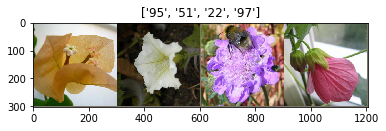

In [18]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.01)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['test']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [3]:
def train_model(model, dataloaders,criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            print('running corrects: ',running_corrects,' dataset_size: ',dataset_sizes[phase])

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                print('best model updated')
        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'
                  .format(time_elapsed // 60, time_elapsed % 60))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [13]:
model1 = models.inception_v3(pretrained=True)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, len(class_names))

model1 = model1.to(device)
model1.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model1.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [23]:
model1 = train_model(model1, dataloaders,criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=50)

Epoch 0/49
----------
train Loss: 4.5154 Acc: 0.0359
running corrects:  tensor(235, device='cuda:0')  dataset_size:  6552
valid Loss: 4.4676 Acc: 0.0293
running corrects:  tensor(24, device='cuda:0')  dataset_size:  818
Training complete in 0m 53s

Epoch 1/49
----------
train Loss: 4.1654 Acc: 0.0659
running corrects:  tensor(432, device='cuda:0')  dataset_size:  6552
valid Loss: 3.8969 Acc: 0.0905
running corrects:  tensor(74, device='cuda:0')  dataset_size:  818
Training complete in 1m 47s

Epoch 2/49
----------
train Loss: 3.7415 Acc: 0.1076
running corrects:  tensor(705, device='cuda:0')  dataset_size:  6552
valid Loss: 3.5861 Acc: 0.1516
running corrects:  tensor(124, device='cuda:0')  dataset_size:  818
Training complete in 2m 41s

Epoch 3/49
----------
train Loss: 3.2101 Acc: 0.1923
running corrects:  tensor(1260, device='cuda:0')  dataset_size:  6552
valid Loss: 3.0495 Acc: 0.2372
running corrects:  tensor(194, device='cuda:0')  dataset_size:  818
Training complete in 3m 35s

E

train Loss: 0.3343 Acc: 0.9069
running corrects:  tensor(5942, device='cuda:0')  dataset_size:  6552
valid Loss: 0.3669 Acc: 0.9108
running corrects:  tensor(745, device='cuda:0')  dataset_size:  818
Training complete in 29m 39s

Epoch 33/49
----------
train Loss: 0.3338 Acc: 0.9113
running corrects:  tensor(5971, device='cuda:0')  dataset_size:  6552
valid Loss: 0.4819 Acc: 0.8900
running corrects:  tensor(728, device='cuda:0')  dataset_size:  818
Training complete in 30m 33s

Epoch 34/49
----------
train Loss: 0.3376 Acc: 0.9129
running corrects:  tensor(5981, device='cuda:0')  dataset_size:  6552
valid Loss: 0.3663 Acc: 0.9156
running corrects:  tensor(749, device='cuda:0')  dataset_size:  818
Training complete in 31m 27s

Epoch 35/49
----------
train Loss: 0.2943 Acc: 0.9130
running corrects:  tensor(5982, device='cuda:0')  dataset_size:  6552
valid Loss: 0.2633 Acc: 0.9438
running corrects:  tensor(772, device='cuda:0')  dataset_size:  818
best model updated
Training complete in 3

In [31]:
!nvidia-smi

Sun Jun  2 15:17:33 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    24W /  75W |    573MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
# TODO: Do validation on the test set
def check_accuracy_on_test(model, testloader):    
    correct = 0
    total = 0
    model.to(device)
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model.forward(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    
    print('Accuracy of the network on the test images: ',( correct / float(total)))
    print('correct: ',correct,' total: ',total)

#check_accuracy_on_test(model1,dataloaders['test'])

In [25]:
check_accuracy_on_test(model1,dataloaders['test'])

Accuracy of the network on the test images:  0.9474969474969475
correct:  776  total:  819


In [66]:
for i,data in enumerate(dataloaders['test']):
    if i == 2:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        print(labels.data)
        model1.to(device)
        output = model1(images)
        _, predicted = torch.max(output.data, 1)
        print(predicted)

tensor([26, 40, 72, 74], device='cuda:0')
tensor([985, 949, 738, 309], device='cuda:0')


In [68]:
# TODO: Save the checkpoint 
model1.class_to_idx = image_datasets['train'].class_to_idx
model1.cpu
torch.save({'structure' :'inception_v3',
            'hidden_layer1':120,
            'state_dict':model1.state_dict(),
            'class_to_idx':model1.class_to_idx},
            'inv3_imagenet_flower.pth')

In [26]:
saved_instance = torch.load('inv3_imagenet_flower.pth')

FileNotFoundError: [Errno 2] No such file or directory: 'inv3_imagenet_flower.pth'

In [22]:
model = models.inception_v3()
model.load_state_dict(saved_instance['state_dict'])
model.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [23]:
model1 = model

In [138]:
!ls

CUB_200_2011	  Untitled.ipynb  flower_data.tar.gz  train
CUB_200_2011.tgz  attributes.txt  test		      valid


In [54]:
!wget http://vision.caltech.edu/~macaodha/inat2018/iNat_2018_InceptionV3.pth.tar

--2019-06-04 14:12:06--  http://vision.caltech.edu/~macaodha/inat2018/iNat_2018_InceptionV3.pth.tar
Resolving vision.caltech.edu (vision.caltech.edu)... 34.208.54.77
Connecting to vision.caltech.edu (vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.vision.caltech.edu/~macaodha/inat2018/iNat_2018_InceptionV3.pth.tar [following]
--2019-06-04 14:12:06--  http://www.vision.caltech.edu/~macaodha/inat2018/iNat_2018_InceptionV3.pth.tar
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Reusing existing connection to vision.caltech.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 321312907 (306M) [application/x-tar]
Saving to: ‘iNat_2018_InceptionV3.pth.tar.1’

iNat_2018_Inception 100%[===================>] 306.43M  18.1MB/s    in 16s     

2019-06-04 14:12:23 (18.6 MB/s) - ‘iNat_2018_InceptionV3.pth.tar.1’ saved [321312907/321312907]



In [27]:
saved_instance2 = torch.load('iNat_2018_InceptionV3.pth.tar')

In [28]:
saved_instance2

{'state_dict': OrderedDict([('Conv2d_1a_3x3.conv.weight',
               tensor([[[[-5.1336e-01, -6.6400e-01, -3.3502e-01],
                         [-3.5305e-01, -5.4817e-01, -2.1623e-01],
                         [ 4.7290e-03, -3.4300e-02,  8.4703e-02]],
               
                        [[ 3.3553e-01,  4.2823e-01,  6.9170e-02],
                         [ 3.3804e-01,  3.2310e-01,  1.4487e-01],
                         [ 1.4615e-01,  1.6275e-01,  1.4518e-01]],
               
                        [[ 2.7258e-01,  4.6930e-01,  2.7612e-02],
                         [ 1.7907e-01,  2.2007e-01,  8.5497e-03],
                         [-2.2242e-01, -1.6798e-01, -2.0826e-01]]],
               
               
                       [[[-4.8039e-02,  3.6145e-02, -9.4287e-03],
                         [ 2.0649e-02,  1.3011e-01,  3.5521e-02],
                         [-3.1532e-02, -1.7264e-02, -6.0822e-02]],
               
                        [[-1.8541e-02, -1.1187e-03,  4.0653e-03],

In [62]:
model2 = models.inception_v3(pretrained=True)
model2.fc = nn.Linear(2048, 8142)
model2.aux_logits = False
checkpoint = torch.load('iNat_2018_InceptionV3.pth.tar')
best_prec3 = checkpoint['best_prec3']
model2.load_state_dict(checkpoint['state_dict'])
model2

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [63]:
model2.fc

Linear(in_features=2048, out_features=8142, bias=True)

In [41]:
num_ftrs = model2.fc.in_features
model2.fc = nn.Linear(num_ftrs, len(class_names))


model2 = model2.to(device)
model2.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model2.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [44]:
model2 = train_model(model2, dataloaders, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)

Epoch 0/99
----------
train Loss: 1.9792 Acc: 0.5301
running corrects:  tensor(3473, device='cuda:0')  dataset_size:  6552
valid Loss: 1.0578 Acc: 0.7237
running corrects:  tensor(592, device='cuda:0')  dataset_size:  818
Training complete in 0m 56s

Epoch 1/99
----------
train Loss: 0.9372 Acc: 0.7544
running corrects:  tensor(4943, device='cuda:0')  dataset_size:  6552
valid Loss: 0.6565 Acc: 0.8227
running corrects:  tensor(673, device='cuda:0')  dataset_size:  818
Training complete in 1m 51s

Epoch 2/99
----------
train Loss: 0.7355 Acc: 0.8011
running corrects:  tensor(5249, device='cuda:0')  dataset_size:  6552
valid Loss: 0.6617 Acc: 0.8399
running corrects:  tensor(687, device='cuda:0')  dataset_size:  818
Training complete in 2m 46s

Epoch 3/99
----------
train Loss: 0.5966 Acc: 0.8446
running corrects:  tensor(5534, device='cuda:0')  dataset_size:  6552
valid Loss: 0.4353 Acc: 0.8814
running corrects:  tensor(721, device='cuda:0')  dataset_size:  818
Training complete in 3m 4

train Loss: 0.1333 Acc: 0.9660
running corrects:  tensor(6329, device='cuda:0')  dataset_size:  6552
valid Loss: 0.0877 Acc: 0.9768
running corrects:  tensor(799, device='cuda:0')  dataset_size:  818
Training complete in 29m 50s

Epoch 33/99
----------
train Loss: 0.1200 Acc: 0.9672
running corrects:  tensor(6337, device='cuda:0')  dataset_size:  6552
valid Loss: 0.0865 Acc: 0.9780
running corrects:  tensor(800, device='cuda:0')  dataset_size:  818
Training complete in 30m 44s

Epoch 34/99
----------
train Loss: 0.1251 Acc: 0.9666
running corrects:  tensor(6333, device='cuda:0')  dataset_size:  6552
valid Loss: 0.0905 Acc: 0.9768
running corrects:  tensor(799, device='cuda:0')  dataset_size:  818
Training complete in 31m 38s

Epoch 35/99
----------
train Loss: 0.1233 Acc: 0.9686
running corrects:  tensor(6346, device='cuda:0')  dataset_size:  6552
valid Loss: 0.0881 Acc: 0.9768
running corrects:  tensor(799, device='cuda:0')  dataset_size:  818
Training complete in 32m 32s

Epoch 36/99

KeyboardInterrupt: 

In [45]:
check_accuracy_on_test(model2,dataloaders['test'])

Accuracy of the network on the test images:  0.9658119658119658
correct:  791  total:  819


In [81]:
torch.save(model2.state_dict(), 'iNat+imagenet-102flowers-98acc.pth')

In [82]:
!ls

flower_data.tar.gz		    test	     valid
iNat_2018_InceptionV3.pth.tar	    train
iNat+imagenet-102flowers-98acc.pth  Untitled1.ipynb


# CUB200

In [3]:
!wget http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz

--2019-06-04 09:20:15--  http://www.vision.caltech.edu/visipedia-data/CUB-200-2011/CUB_200_2011.tgz
Resolving www.vision.caltech.edu (www.vision.caltech.edu)... 34.208.54.77
Connecting to www.vision.caltech.edu (www.vision.caltech.edu)|34.208.54.77|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150585339 (1.1G) [application/x-tar]
Saving to: ‘CUB_200_2011.tgz’

CUB_200_2011.tgz    100%[===================>]   1.07G  16.6MB/s    in 88s     

2019-06-04 09:21:42 (12.5 MB/s) - ‘CUB_200_2011.tgz’ saved [1150585339/1150585339]



In [6]:
!tar zxvf CUB_200_2011.tgz

attributes.txt
CUB_200_2011/
CUB_200_2011/images/
CUB_200_2011/images/001.Black_footed_Albatross/
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0032_796115.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0057_796106.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0036_796127.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0060_796076.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0019_796104.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0069_796139.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0089_796069.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0071_796113.jpg
CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0077_796114.jpg
CUB_200_2011/images/001.Black_footed_Albat

CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0054_796347.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0020_796359.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0051_796374.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0010_796355.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0066_796382.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0044_1105.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0030_1122.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0076_796365.jpg
CUB_200_2011/images/003.Sooty_Albatross/Sooty_Albatross_0007_796372.jpg
CUB_200_2011/images/004.Groove_billed_Ani/
CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0044_1731.jpg
CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0018_1613.jpg
CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0007_1615.jpg
CUB_200_2011/images/004.Groove_billed_Ani/Groove_Billed_Ani_0051_1650.jpg
CUB_200_2011/imag

CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0035_795934.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0065_795969.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0056_795926.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0062_795958.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0027_795925.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0069_795936.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0001_795972.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0042_795961.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0074_795976.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0080_795965.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0059_795973.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0032_795986.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0012_795927.jpg
CUB_200_2011/images/007.Parakeet_Auklet/Parakeet_Auklet_0004_795

CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0105_4842.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0081_6081.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0061_4196.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0066_5070.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0046_4242.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0052_5575.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0012_6015.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0054_4625.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0055_4345.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0044_5621.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0096_5019.jpg
CUB_200_2011/images/010.Red_winged_Blackbird/Red_Winged_Blackbird_0021_3767.jpg
CUB_200_2011/images/010.Red_winged_Black

CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0062_8310.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0077_8332.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0007_8366.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0083_8300.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0057_8236.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0087_8358.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0003_8337.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0074_8452.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0070_8583.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0084_8435.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow_Headed_Blackbird_0058_8350.jpg
CUB_200_2011/images/012.Yellow_headed_Blackbird/Yellow

CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0060_14495.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0063_11820.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0036_13716.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0015_12632.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0071_11639.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0051_12837.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0037_14128.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0033_12777.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0072_14197.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0073_13933.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0065_14558.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0016_13661.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0027_11579.jpg
CUB_200_2011/images/014.Indigo_Bunting/Indigo_Bunting_0078_11852.jpg
CUB_200_2011/images/014.Indigo_Bun

CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0044_16557.jpg
CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0027_16536.jpg
CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0040_16691.jpg
CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0029_16530.jpg
CUB_200_2011/images/016.Painted_Bunting/Painted_Bunting_0077_16819.jpg
CUB_200_2011/images/017.Cardinal/
CUB_200_2011/images/017.Cardinal/Cardinal_0053_17541.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0029_17297.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0025_17239.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0012_18638.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0081_17291.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0079_19044.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0028_18054.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0083_18042.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0054_19334.jpg
CUB_200_2011/images/017.Cardinal/Cardinal_0066_17803.jpg
CUB_200_2011/images/017.Cardinal/Cardinal

CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0069_21065.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0139_21281.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0113_21270.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0053_20694.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0044_20955.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0007_20186.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0075_21125.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0008_20430.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0024_20739.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0028_20598.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0031_21635.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0019_20567.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0071_20974.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0032_21551.jpg
CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0080_20139.jpg
CUB_200_2011/images/020.Y

CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0049_22357.jpg
CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0053_22623.jpg
CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0125_22220.jpg
CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0091_22629.jpg
CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0086_22611.jpg
CUB_200_2011/images/021.Eastern_Towhee/Eastern_Towhee_0031_22233.jpg
CUB_200_2011/images/022.Chuck_will_Widow/
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0003_796977.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0057_796970.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0017_796960.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0007_796958.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0053_796953.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0059_796982.jpg
CUB_200_2011/images/022.Chuck_will_Widow/Chuck_Will_Widow_0005_796998.jpg
CUB_200_2011/images/022.Ch

CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0054_23812.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0080_23890.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0093_23722.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0044_23536.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0008_23602.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0037_23889.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0011_23667.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0012_23565.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0084_23836.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0017_23875.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0053_23760.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0029_23545.jpg
CUB_200_2011/images/025.Pelagic_Cormorant/Pelagic_Cormorant_0038_23643.jpg
CUB_200_2011/images/025.P

CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0051_24438.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0029_24372.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0079_24399.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0043_796857.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0032_24284.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0005_796873.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0059_24421.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0037_24440.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0078_796846.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0082_24279.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0030_24206.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0056_24321.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0031_796851.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0074_24297.jpg
CUB_200_2011/images/027.Shiny_Cowbird/Shiny_Cowbird_0068_2

CUB_200_2011/images/029.American_Crow/American_Crow_0021_25137.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0030_25092.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0121_25720.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0053_25203.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0088_25303.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0031_25433.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0079_25463.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0004_25819.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0137_25221.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0014_25287.jpg
CUB_200_2011/images/029.American_Crow/American_Crow_0001_25053.jpg
CUB_200_2011/images/030.Fish_Crow/
CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0070_25504.jpg
CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0079_26030.jpg
CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0022_26062.jpg
CUB_200_2011/images/030.Fish_Crow/Fish_Crow_0060_26

CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0051_794627.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0006_794626.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0039_26348.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0014_26388.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0032_794603.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0017_794623.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0047_794604.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0040_26378.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0053_26390.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0026_794609.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0043_794605.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0008_26357.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0009_26354.jpg
CUB_200_2011/images/032.Mangrove_Cuckoo/Mangrove_Cuckoo_0003_794619.jp

CUB_200_2011/images/034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0048_27236.jpg
CUB_200_2011/images/034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0076_27200.jpg
CUB_200_2011/images/034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0084_27034.jpg
CUB_200_2011/images/034.Gray_crowned_Rosy_Finch/Gray_Crowned_Rosy_Finch_0007_797278.jpg
CUB_200_2011/images/035.Purple_Finch/
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0014_27322.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0082_27639.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0050_27702.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0088_28076.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0013_27506.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0114_27837.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0006_27950.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0096_27688.jpg
CUB_200_2011/images/035.Purple_Finch/Purple_Finch_0113_27547.jpg
CUB_200_2011/images/035.Purp

CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0035_795618.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0008_795599.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0010_29199.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0017_795598.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0016_29217.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0009_29155.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0038_795616.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0041_795605.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0031_795582.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0036_795577.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0060_795604.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0005_29157.jpg
CUB_200_2011/images/037.Acadian_Flycatcher/Acadian_Flycatcher_0043_2

CUB_200_2011/images/039.Least_Flycatcher/Least_Flycatcher_0023_30352.jpg
CUB_200_2011/images/039.Least_Flycatcher/Least_Flycatcher_0050_30189.jpg
CUB_200_2011/images/039.Least_Flycatcher/Least_Flycatcher_0057_30282.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0064_30485.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0034_30672.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0020_796881.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0012_796876.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0070_30490.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0005_30734.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0016_30717.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Olive_Sided_Flycatcher_0009_796885.jpg
CUB_200_2011/images/040.Olive_sided_Flycatcher/Oli

CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0031_42201.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0047_42488.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0017_42407.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0070_42250.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0063_42179.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0024_42506.jpg
CUB_200_2011/images/042.Vermilion_Flycatcher/Vermilion_Flycatcher_0052_42551.jpg
CUB_200_2011/images/043.Yellow_bellied_Flycatcher/
CUB_200_2011/images/043.Yellow_bellied_Flycatcher/Yellow_Bellied_Flycatcher_0049_42593.jpg
CUB_200_2011/images/043.Yellow_bellied_Flycatcher/Yellow_Bellied_Flycatcher_0031_42580.jpg
CUB_200_2011/images/043.Yellow_bellied_Flycatcher/Yellow_Bellied_Flycatcher_0023_795478.jpg
CUB_200_2011/images/043.Yellow_bellied_Flycatcher/Yellow_Bellied_Flycatcher_0035_795464.jpg
CUB_200_2011/ima

CUB_200_2011/images/045.Northern_Fulmar/Northern_Fulmar_0053_43843.jpg
CUB_200_2011/images/045.Northern_Fulmar/Northern_Fulmar_0091_44120.jpg
CUB_200_2011/images/046.Gadwall/
CUB_200_2011/images/046.Gadwall/Gadwall_0024_30942.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0039_31013.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0097_30893.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0029_31637.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0017_30979.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0064_31504.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0060_31686.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0075_30892.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0096_31560.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0034_31212.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0005_30924.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0030_31855.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0001_31235.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0042_31411.jpg
CUB_200_2011/images/046.Gadwall/Gadwall_0012_30920.jpg


CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0084_33147.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0040_794643.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0047_33332.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0036_794642.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0092_794671.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0034_33256.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0037_33149.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0106_33298.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0077_33346.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0062_794657.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0085_794682.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0017_794638.jpg
CUB_200_2011/images/048.European_Goldfinch/European_Goldfinch_0087_794

CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0068_35111.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0072_34497.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0093_34720.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0003_34983.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0019_34811.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0086_34749.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0070_34514.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0090_34640.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0002_34577.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0011_34687.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0078_34799.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0046_34926.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0009_34952.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0085_34713.jpg
CUB_200_2011/images/051.Horned_Grebe/Horned_Grebe_0084_34936.jpg
CUB_200_2011/images/051.H

CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0042_36035.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0029_36379.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0083_36033.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0048_36399.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0071_36536.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0081_36578.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0009_36477.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0036_36521.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0051_36249.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0091_36194.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0021_36282.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0049_36219.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0011_36522.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0044_36188.jpg
CUB_200_2011/images/053.Western_Grebe/Western_Grebe_0038_36363

CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0054_38953.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0002_38214.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0115_38330.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0038_38956.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0114_38259.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0059_38581.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0043_38992.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0003_38437.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0019_38845.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0033_38945.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0006_38421.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0104_38362.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0082_38552.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0100_38988.jpg
CUB_200_2011/images/056.Pine_Grosbeak/Pine_Grosbeak_0049_38380

CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0100_40179.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0037_40149.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0075_40159.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0040_40270.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0052_40137.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0079_40389.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0043_39861.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0038_40035.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0087_39897.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0042_40281.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0030_40089.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0003_39986.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Guillemot_0089_40008.jpg
CUB_200_2011/images/058.Pigeon_Guillemot/Pigeon_Gui

CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0020_45409.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0079_45468.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0035_45754.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0053_45854.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0122_45627.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0024_45486.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0102_45904.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0142_45798.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0044_45705.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0056_45751.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0112_45748.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0098_45753.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0100_45440.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0009_45905.jpg
CUB_200_2011/images/061.Heermann_Gull/Heermann_Gull_0139_45749

CUB_200_2011/images/063.Ivory_Gull/Ivory_Gull_0071_49402.jpg
CUB_200_2011/images/064.Ring_billed_Gull/
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0052_51357.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0070_51316.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0129_51246.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0017_51412.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0098_51410.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0028_51454.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0059_51554.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0125_51307.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0054_51414.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0118_51322.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0055_51156.jpg
CUB_200_2011/images/064.Ring_billed_Gull/Ring_Billed_Gull_0003_51480.jpg
CUB_200_2011/images/0

CUB_200_2011/images/066.Western_Gull/Western_Gull_0035_55703.jpg
CUB_200_2011/images/066.Western_Gull/Western_Gull_0100_54761.jpg
CUB_200_2011/images/067.Anna_Hummingbird/
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0043_56059.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0102_56087.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0038_57036.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0098_56388.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0029_55823.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0112_56353.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0047_56049.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0023_55841.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0094_56092.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0006_55871.jpg
CUB_200_2011/images/067.Anna_Hummingbird/Anna_Hummingbird_0127_56520.jpg
CUB_200_2011/images/067.A

CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0011_59480.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0081_59592.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0076_59563.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0130_59500.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0002_58387.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0100_59541.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0119_59681.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0101_59420.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0121_59376.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0125_58932.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0036_59562.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0090_58598.jpg
CUB_200_2011/images/069.Rufous_Hummingbird/Rufous_Hummingbird_0009_59405.jpg

CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0061_63645.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0017_62854.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0024_63167.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0054_61656.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0095_63505.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0048_62433.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0051_63339.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0035_63560.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0099_64435.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0010_61939.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0085_62831.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0080_61617.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0003_63408.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0027_63133.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0102_61494.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0038_62784.jpg
CUB_200_2011/images/073.Blue_Jay/Blue_Jay_0042_61545.jpg
CUB_200_2011/images/073.Blue_Ja

CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0030_68439.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0056_67498.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0088_66722.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0109_66326.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0091_67304.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0090_69051.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0026_68061.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0086_66437.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0132_66476.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0089_68498.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0096_68514.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0115_68840.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0103_67700.jpg
CUB_200_2011/images/076.Dark_eyed_Junco/Dark_Eyed_Junco_0113_68470.jpg
CUB_20

CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0017_70161.jpg
CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0004_70293.jpg
CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0051_70139.jpg
CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0029_795015.jpg
CUB_200_2011/images/078.Gray_Kingbird/Gray_Kingbird_0021_70228.jpg
CUB_200_2011/images/079.Belted_Kingfisher/
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0073_70326.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0020_70922.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0053_70899.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0099_70449.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0044_70494.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0061_70363.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0013_70753.jpg
CUB_200_2011/images/079.Belted_Kingfisher/Belted_Kingfisher_0016_70495.jpg
CUB_200_2011/images/0

CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0022_72247.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0109_72082.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0033_71883.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0002_71698.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0028_72221.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0068_72278.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0021_72498.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0047_72401.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0036_72275.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0015_72299.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0059_72492.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0030_72603.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0097_71895.jpg
CUB_200_2011/images/081.Pied_Kingfisher/Pied_Kingfisher_0067_71641.jpg
CUB_20

CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0036_73814.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0066_795419.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0067_795401.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0007_795402.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0063_795453.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0010_73789.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0045_795426.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0044_795388.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0024_795441.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0071_73800.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0016_795460.jpg
CUB_200_2011/images/084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0021_73808.jpg
CUB_200_2011/images/

CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0068_75836.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0020_75596.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0004_75815.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0027_75542.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0003_75442.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0062_75587.jpg
CUB_200_2011/images/086.Pacific_Loon/Pacific_Loon_0032_75441.jpg
CUB_200_2011/images/087.Mallard/
CUB_200_2011/images/087.Mallard/Mallard_0050_76519.jpg
CUB_200_2011/images/087.Mallard/Mallard_0013_77619.jpg
CUB_200_2011/images/087.Mallard/Mallard_0026_76725.jpg
CUB_200_2011/images/087.Mallard/Mallard_0061_76378.jpg
CUB_200_2011/images/087.Mallard/Mallard_0025_76465.jpg
CUB_200_2011/images/087.Mallard/Mallard_0077_75911.jpg
CUB_200_2011/images/087.Mallard/Mallard_0071_76940.jpg
CUB_200_2011/images/087.Mallard/Mallard_0136_76593.jpg
CUB_200_2011/images/087.Mallard/Mallard_0114_76924.jpg
CUB_200_2011/imag

CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0061_796723.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0057_796742.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0058_796770.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0032_79032.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0083_796773.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0034_796762.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0011_796750.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0090_796774.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0023_796784.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0070_79054.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0093_79075.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0014_796739.jpg
CUB_200_2011/images/089.Hooded_Merganser/Hooded_Merganser_0085_79146.jpg
CUB_200_2011/images/089.Hooded_Merganser/H

CUB_200_2011/images/091.Mockingbird/Mockingbird_0023_80121.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0064_81068.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0025_79935.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0013_82010.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0067_79723.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0042_81728.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0089_80601.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0001_79812.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0076_79934.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0098_81117.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0054_81703.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0026_81214.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0006_79819.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0018_81183.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0016_79605.jpg
CUB_200_2011/images/091.Mockingbird/Mockingbird_0030_79

CUB_200_2011/images/093.Clark_Nutcracker/Clark_Nutcracker_0051_84950.jpg
CUB_200_2011/images/093.Clark_Nutcracker/Clark_Nutcracker_0078_85416.jpg
CUB_200_2011/images/093.Clark_Nutcracker/Clark_Nutcracker_0076_85083.jpg
CUB_200_2011/images/093.Clark_Nutcracker/Clark_Nutcracker_0090_85116.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0025_85803.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0097_85940.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0095_86425.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0039_86166.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0094_86156.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0066_86159.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/White_Breasted_Nuthatch_0047_85819.jpg
CUB_200_2011/images/094.White_breasted_Nuthatch/Wh

CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0049_89955.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0055_90850.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0070_90221.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0125_90382.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0115_90442.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0060_90879.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0124_90350.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0068_90397.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0043_90499.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0067_90416.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0013_90445.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0118_90049.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0076_90895.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0050_90629.jpg
CUB_200_2011/images/096.Hooded_Oriole/Hooded_Oriole_0104_90264

CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0007_92439.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0073_92369.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0054_92310.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0079_92248.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0015_795862.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0065_795819.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0035_795851.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0017_795832.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0071_795848.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0057_795856.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0034_795813.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0010_795852.jpg
CUB_200_2011/images/098.Scott_Oriole/Scott_Oriole_0055_795825.jpg
CUB_200_2011/images/099.Ovenbird/
CUB_200_2011/images/099.Ovenbird/Ovenbird_0135_93168.jpg
CUB_200_2011/images/099.Ovenbird/Ovenbird_0003_92910.jp

CUB_200_2011/images/101.White_Pelican/White_Pelican_0047_97190.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0067_95573.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0050_97913.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0084_95877.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0028_95950.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0075_96422.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0026_95832.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0005_95916.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0010_96876.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0015_96952.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0013_96901.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0044_96028.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0012_97261.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0056_97071.jpg
CUB_200_2011/images/101.White_Pelican/White_Pelican_0068_95635

CUB_200_2011/images/103.Sayornis/Sayornis_0039_98420.jpg
CUB_200_2011/images/103.Sayornis/Sayornis_0075_98350.jpg
CUB_200_2011/images/103.Sayornis/Sayornis_0134_98339.jpg
CUB_200_2011/images/104.American_Pipit/
CUB_200_2011/images/104.American_Pipit/American_Pipit_0019_99810.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0037_99954.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0087_99996.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0089_100260.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0095_99959.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0027_100189.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0008_100390.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0081_99785.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0058_100218.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0011_99630.jpg
CUB_200_2011/images/104.American_Pipit/American_Pipit_0062_100000.jpg
CUB_200_2011/images/104.A

CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0016_100993.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0055_100882.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0012_100763.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0030_100725.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0040_100891.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0025_100942.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0042_100760.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0082_100876.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0078_100777.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0066_100877.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0031_100804.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0004_100733.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0001_100973.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puffin_0062_100693.jpg
CUB_200_2011/images/106.Horned_Puffin/Horned_Puf

CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0060_797365.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0062_797382.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0064_797378.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0009_102518.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0006_797347.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0029_797349.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0070_102645.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0005_102653.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0011_797367.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0024_797364.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0065_797354.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_0008_797389.jpg
CUB_200_2011/images/108.White_necked_Raven/White_Necked_Raven_00

CUB_200_2011/images/110.Geococcyx/Geococcyx_0011_104779.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0137_104693.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0027_104291.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0050_104506.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0024_104243.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0015_104792.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0056_104142.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0012_104352.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0136_104144.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0048_104817.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0045_104166.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0099_104134.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0101_104230.jpg
CUB_200_2011/images/110.Geococcyx/Geococcyx_0033_104195.jpg
CUB_200_2011/images/111.Loggerhead_Shrike/
CUB_200_2011/images/111.Loggerhead_Shrike/Loggerhead_Shrike_0018_26407.jpg
CUB_200_2011/images/111.Loggerhead_Shrike/

CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0001_794578.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0011_794577.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0020_106863.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0017_794586.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0005_794565.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0031_794580.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0023_794559.jpg
CUB_200_2011/images/113.Baird_Sparrow/Baird_Sparrow_0042_794560.jpg
CUB_200_2011/images/114.Black_throated_Sparrow/
CUB_200_2011/images/114.Black_throated_Sparrow/Black_Throated_Sparrow_0096_107238.jpg
CUB_200_2011/images/114.Black_throated_Sparrow/Black_Throated_Sparrow_0010_107375.jpg
CUB_200_2011/images/114.Black_throated_Sparrow/Black_Throated_Sparrow_0102_107243.jpg
CUB_200_2011/images/114.Black_throated_Sparrow/Black_Throated_Sparrow_0090_107295.jpg
CUB_200_2011/images/114.Black_throated_Sparrow/Black_Throated_Sp

CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0098_108644.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0015_108462.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0041_108370.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0096_109853.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0024_109445.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0021_109588.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0109_108162.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0086_109022.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0111_108515.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0103_109529.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0091_108308.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0004_108430.jpg
CUB_200_2011/images/116.Chipping_Sparrow/Chipping_Sparrow_0018_108295.jpg
CUB_200_2011/images/116.Chipping_Sparr

CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0094_112773.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0028_113217.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0126_110959.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0007_111029.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0096_111519.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0120_113001.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0010_112678.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0025_111669.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0084_111300.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0002_112905.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0014_112947.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0063_111460.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0015_111085.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0019_112645.jpg
CUB_200_2011/images/118.House_Sparrow/House_Spar

CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0026_115915.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0003_115676.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0019_115958.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0058_115862.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0125_116031.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0017_115908.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0001_115938.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0041_116288.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0029_115761.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0050_116301.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0020_116289.jpg
CUB_200_2011/images/121.Grasshopper_Sparrow/Grasshopper_Sparrow_0040_115696.jpg
CUB_200_2011/images/121.Grasshopper_Spar

CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0096_116758.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0037_796579.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0031_796594.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0081_116755.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0059_796569.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0083_116844.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0018_116834.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0087_116942.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0030_116890.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0006_796607.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0107_796614.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0054_116850.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0098_796601.jpg
CUB_200_2011/images/123.Henslow_Sparrow/Henslow_Sparrow_0021_116

CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0033_117303.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0061_117529.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0129_117898.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0026_117754.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0017_117432.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0035_117383.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0078_117483.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0069_117812.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0045_117547.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0116_117372.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0037_117837.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0066_117875.jpg
CUB_200_2011/images/125.Lincoln_Sparrow/Lincoln_Sparrow_0099_117482.jpg
CUB_200_2011/images/126.Nelson_Sharp_tailed_Sparrow/
CUB_200_201

CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0035_796533.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0066_120791.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0039_796530.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0011_120820.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0012_120732.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0024_120751.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0041_796529.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0021_120699.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0017_796513.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0015_796500.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0067_796532.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0042_796528.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0045_120696.jpg
CUB_200_2011/images/128.Seaside_Sparrow/Seaside_Sparrow_0064_120

CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0039_124140.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0022_123496.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0122_123927.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0024_123805.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0095_124090.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0072_123991.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0009_123294.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0044_122946.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0109_123802.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0043_124034.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0066_123569.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0080_124120.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0076_123669.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0112_125014.jpg
CUB_200_2011/images/130.Tree_Sparrow/Tree_Sparrow_0005_122949.jpg
CUB_200_20

CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0043_127096.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0017_125829.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0109_128529.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0031_126457.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0102_127708.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0118_127919.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0002_127774.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0090_125864.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0054_126068.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0049_128311.jpg
CUB_200_2011/images/132.White_crowned_Sparrow/White_Crowned_Sparrow_0089_127778.jpg
CUB_200_2011/images/133.White_throated_Sparrow/
CUB_200_2011/images/133.Whit

CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0058_129756.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0054_129743.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0066_129559.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0037_129903.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0067_129959.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0069_129802.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0010_129592.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0049_129611.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0004_129549.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0057_129499.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0045_129483.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0064_129816.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0044_129687.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0036_129567.jpg
CUB_200_2011/images/135.Bank_Swallow/Bank_Swallow_0053_129501.jpg
CUB_200_20

CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0013_133169.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0073_133116.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0060_133280.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0006_133489.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0061_133259.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0099_133948.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0083_133771.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0035_133097.jpg
CUB_200_2011/images/137.Cliff_Swallow/Cliff_Swallow_0052_133055.jpg
CUB_200_2011/images/138.Tree_Swallow/
CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0013_135923.jpg
CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0017_135062.jpg
CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0015_134790.jpg
CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0049_134740.jpg
CUB_200_2011/images/138.Tree_Swallow/Tree_Swallow_0069_135148.jpg
CUB_200_2011/images/

CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0046_139802.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0066_140621.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0025_139320.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0088_139473.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0010_139948.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0125_139399.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0111_139605.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0095_139882.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0030_139210.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0101_139441.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0117_140812.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0075_139858.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0062_140633.jpg
CUB_200_2011/images/140.Summer_Tanager/Summer_Tanager_0080_140110.jpg
CUB_200_2011/images/

CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0072_147667.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0107_145639.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0027_145899.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0109_145948.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0101_145164.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0120_145650.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0015_145664.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0013_145553.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0006_145594.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0117_146009.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0078_146824.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0070_147545.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0011_146058.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0049_145755.jpg
CUB_200_2011/images/143.Caspian_Tern/Caspian_Tern_0066_147680.jpg
CUB_200_20

CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0069_151229.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0053_152175.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0035_151757.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0077_152255.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0114_152768.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0066_151478.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0027_151456.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0068_152078.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0075_152258.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0121_151385.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0034_152667.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0127_150418.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0125_151399.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_Tern_0001_152174.jpg
CUB_200_2011/images/146.Forsters_Tern/Forsters_T

CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0085_154822.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0067_797426.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0072_154946.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0014_797415.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0015_797425.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0021_797404.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0037_797405.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0005_154784.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0104_797403.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0017_797400.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0079_154764.jpg
CUB_200_2011/images/148.Green_tailed_Towhee/Green_Tailed_Towhee_0101_154907.jpg
CUB_200_2011/images/149.Brown_Thrasher/


CUB_200_2011/images/150.Sage_Thrasher/Sage_Thrasher_0064_155531.jpg
CUB_200_2011/images/150.Sage_Thrasher/Sage_Thrasher_0038_155498.jpg
CUB_200_2011/images/150.Sage_Thrasher/Sage_Thrasher_0044_155610.jpg
CUB_200_2011/images/150.Sage_Thrasher/Sage_Thrasher_0050_155475.jpg
CUB_200_2011/images/150.Sage_Thrasher/Sage_Thrasher_0009_155463.jpg
CUB_200_2011/images/151.Black_capped_Vireo/
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0047_155743.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0014_797462.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0010_155832.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0006_797491.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0044_155819.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0016_797489.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0007_797481.jpg
CUB_200_2011/images/151.Black_capped_Vireo/Black_Capped_Vireo_0003_797

CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0084_794790.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0021_794765.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0057_156525.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0031_156632.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0060_156555.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0022_156546.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0028_156510.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0010_794769.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0016_156598.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0035_156596.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0059_794799.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_0055_156575.jpg
CUB_200_2011/images/153.Philadelphia_Vireo/Philadelphia_Vireo_00

CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0128_158993.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0002_159180.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0015_159081.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0066_159477.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0050_158829.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0110_158947.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0082_159186.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0126_159341.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0071_159072.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0102_159420.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0032_159145.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0122_159284.jpg
CUB_200_2011/images/156.White_eyed_Vireo/White_Eyed_Vireo_0012_159495.jpg
CUB_200_2011/images/156.White_eyed_Vir

CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0082_797121.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0080_159749.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0028_797119.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0101_797146.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0065_159722.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0051_797132.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0053_797157.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0016_797134.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0110_159735.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0019_159871.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0085_797107.jpg
CUB_200_2011/images/158.Bay_breasted_Warbler/Bay_Breasted_Warbler_0054_797124.jpg
CUB_200_2011/ima

CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0035_161741.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0071_161900.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0076_161894.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0023_161774.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0043_161804.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0020_161875.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0051_161766.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0092_162044.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0079_161909.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0059_162064.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0034_161861.jpg
CUB_200_2011/images/161.Blue_winged_Warbler/Blue_Winged_Warbler_0014_161783.jpg
CUB_200_2011/images/161.Blue_winged_Warb

CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0068_163147.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0032_162659.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0128_162971.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0053_162950.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0124_163037.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0117_163079.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0026_162913.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0008_163062.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0046_163167.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0092_163057.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0095_162965.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0048_162915.jpg
CUB_200_2011/images/163.Cape_May_Warbler/Cape_May_Warbler_0033_162657.jpg
CUB_200_2011/images/163.Cape_May_Warbl

CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0012_164496.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0083_794801.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0059_794855.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0004_164470.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0071_164370.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0066_794803.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0092_164465.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0044_794836.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0061_164516.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0046_794828.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0016_794841.jpg
CUB_200_2011/images/166.Golden_winged_Warbler/Golden_Winged_Warbler_0056_794

CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0092_165807.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0137_165507.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0053_165682.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0029_165567.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0001_166266.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0054_165965.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0063_166121.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0106_165689.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0040_165921.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0041_165709.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0076_165832.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0112_166406.jpg
CUB_200_2011/images/169.Magnolia_Warbler/Magnolia_Warbler_0011_166382.jpg
CUB_200_2011/images/169.Magnolia_Warbl

CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0086_166926.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0088_166639.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0054_166985.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0063_93378.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0083_166738.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0074_166637.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0016_166736.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0020_166997.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0093_166986.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0071_166692.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0034_166720.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0091_166762.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0032_166847.jpg
CUB_200_2011/images/171.Myrtle_Warbler/Myrtle_Warbler_0097_167001.jpg
CUB_200_2011/images/1

CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0126_168445.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0112_168437.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0007_167545.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0081_167647.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0021_168263.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0088_168052.jpg
CUB_200_2011/images/173.Orange_crowned_Warbler/Orange_Crowned_Warbler_0027_168381.jpg
CUB_200_2011/images/174.Palm_Warbler/
CUB_200_2011/images/174.Palm_Warbler/Palm_Warbler_0095_170610.jpg
CUB_200_2011/images/174.Palm_Warbler/Palm_Warbler_0112_169595.jpg
CUB_200_2011/images/174.Palm_Warbler/Palm_Warbler_0028_169670.jpg
CUB_200_2011/images/174.Palm_Warbler/Palm_Warbler_0054_169175.jpg
CUB_200_2011/images/174.Palm_Warbler/Palm_Warbler_0089_168968.jpg
CUB_200_2011/images/174.Palm_W

CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0031_172818.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0104_172615.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0002_172622.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0105_172982.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0050_173281.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0112_173383.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0123_172603.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0135_172745.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0020_173359.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0137_172610.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0082_172783.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0073_172771.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0136_172768.jpg
CUB_200_2011/images/176.Prairie_Warbler/Prairie_Warbler_0086_172

CUB_200_2011/images/179.Tennessee_Warbler/
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0019_174786.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0023_174977.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0091_175050.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0095_174903.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0100_175168.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0051_175015.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0045_174913.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0022_174799.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0071_175084.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0004_174997.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0052_175089.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Tennessee_Warbler_0067_174999.jpg
CUB_200_2011/images/179.Tennessee_Warbler/Ten

CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0050_176150.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0082_176144.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0036_795573.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0005_175977.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0051_176068.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0087_175978.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0016_795528.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0069_176055.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0066_92460.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0075_176045.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0098_795565.jpg
CUB_200_2011/images/181.Worm_eating_Warbler/Worm_Eating_Warbler_0027_176062.jpg
CUB_200_2011/images/181.Worm_eating_Warbl

CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0021_177187.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0110_177074.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0098_177116.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0072_177121.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0060_177213.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0057_177291.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0023_177002.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0086_177358.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0046_176984.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0077_177152.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0079_177008.jpg
CUB_200_2011/images/183.Northern_Waterthrush/Northern_Waterthrush_0042_177272.jpg
CUB_200_2011/ima

CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0026_178878.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0031_178929.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0118_178779.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0037_179710.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0076_178732.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0093_178139.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0101_179707.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0096_178164.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0003_178570.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0065_179017.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0029_179569.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0006_179394.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0125_178921.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxwing_0041_179183.jpg
CUB_200_2011/images/186.Cedar_Waxwing/Cedar_Waxw

CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0098_180170.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0053_179960.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0106_180446.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0015_180072.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0009_180460.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0026_180078.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0002_180024.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0012_179976.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0093_180205.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0114_180455.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0060_180443.jpg
CUB_200_2011/images/188.Pileated_Woodpecker/Pileated_Woodpecker_0121_180026.jpg
CUB_200_2011/images/188.Pileated_Woodpec

CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0045_794727.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0031_794737.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0042_182373.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0053_794707.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0048_182599.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0038_794719.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0024_794708.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0051_182347.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0030_794711.jpg
CUB_200_2011/images/190.Red_cockaded_Woodpecker/Red_Cockaded_Woodpecker_0057_794725.jpg
CUB_200_2011/images/191.Red_headed_Woodpecker/
CUB_200_2011/images/191.Red_headed_Woodpecker/Red_Headed_Woodpecker_0055_

CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0107_184908.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0042_184878.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0104_185256.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0088_184733.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0010_185142.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0004_185202.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0068_184895.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0047_184707.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0097_185358.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0083_185190.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0015_184981.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0025_184932.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0084_184715.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0135_185251.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewick_Wren_0124_184771.jpg
CUB_200_2011/images/193.Bewick_Wren/Bewi

CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0033_186848.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0113_186675.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0014_186525.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0112_186562.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0029_186212.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0047_186928.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0051_186510.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0013_187086.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0072_186309.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0028_186526.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0069_186230.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0108_186089.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0062_186390.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_Wren_0060_186296.jpg
CUB_200_2011/images/195.Carolina_Wren/Carolina_W

CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0048_188370.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0115_188443.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0099_188579.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0119_188404.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0082_188699.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0117_188676.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0022_188280.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0070_188205.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0043_188426.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0028_188797.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0015_188852.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0147_188367.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0106_188100.jpg
CUB_200_2011/images/197.Marsh_Wren/Marsh_Wren_0069_188776.jpg
CUB_200_2011/images/198.Rock_Wren/
CUB_200_2011/images/198.Rock_Wren/Rock_Wren_0024_188942.jpg
CUB_200_2011/images/198.Rock_Wren/Roc

CUB_200_2011/images/199.Winter_Wren/Winter_Wren_0090_190104.jpg
CUB_200_2011/images/200.Common_Yellowthroat/
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0006_190576.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0077_190990.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0015_190556.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0081_190525.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0072_190402.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0092_190573.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0004_190606.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0087_190414.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0032_190592.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0069_190400.jpg
CUB_200_2011/images/200.Common_Yellowthroat/Common_Yellowthroat_0003_190521.jpg
CUB_200_201

In [49]:
CUB_dir = 'CUB_200_2011/images'

In [50]:
q = datasets.ImageFolder(CUB_dir,data_transforms['test'])

In [68]:
validation_split = .2
shuffle_dataset = True
random_seed= 42
# Creating data indices for training and validation splits:
dataset_size = len(q)
indices = list(range(dataset_size))
split1 = int((dataset_size * validation_split)/2)
split2 = int(dataset_size * validation_split)

np.random.seed(random_seed)
np.random.shuffle(indices)

val_indices, test_indices, train_indices = indices[:split1], indices[split1:split2], indices[split2:]

# Creating PT data samplers and loaders:
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)
test_sampler = torch.utils.data.sampler.SubsetRandomSampler(test_indices)

CUB_samplers={'train':train_sampler,
            'valid':valid_sampler,
            'test':test_sampler}



In [69]:
split1

1178

In [70]:
CUB_dataloaders = {x: torch.utils.data.DataLoader(q, batch_size=64,
                        sampler=CUB_samplers[x], num_workers=4)
                                  for x in ['train', 'valid','test']}
dataset_sizes = {'train':dataset_size-split2, 'valid':split1,
                     'test':split2-split1}
class_names = q.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
model1 = models.inception_v3(pretrained=True)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, len(class_names))

model1 = model1.to(device)
model1.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model1.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [72]:
dataset_sizes

{'train': 9431, 'valid': 1178, 'test': 1179}

In [76]:
model1 = train_model(model1, CUB_dataloaders,criterion, optimizer_ft, exp_lr_scheduler,
                    num_epochs=60)

Epoch 0/59
----------
train Loss: 3.1796 Acc: 0.1935
running corrects:  tensor(1825, device='cuda:0')  dataset_size:  9431
valid Loss: 2.5719 Acc: 0.3098
running corrects:  tensor(365, device='cuda:0')  dataset_size:  1178
Training complete in 1m 2s

Epoch 1/59
----------
train Loss: 2.0499 Acc: 0.4230
running corrects:  tensor(3989, device='cuda:0')  dataset_size:  9431
valid Loss: 2.1365 Acc: 0.4194
running corrects:  tensor(494, device='cuda:0')  dataset_size:  1178
Training complete in 2m 4s

Epoch 2/59
----------
train Loss: 1.4094 Acc: 0.5870
running corrects:  tensor(5536, device='cuda:0')  dataset_size:  9431
valid Loss: 1.8244 Acc: 0.4966
running corrects:  tensor(585, device='cuda:0')  dataset_size:  1178
Training complete in 3m 6s

Epoch 3/59
----------
train Loss: 1.0319 Acc: 0.6857
running corrects:  tensor(6467, device='cuda:0')  dataset_size:  9431
valid Loss: 1.4817 Acc: 0.5900
running corrects:  tensor(695, device='cuda:0')  dataset_size:  1178
Training complete in 4m 

train Loss: 0.0303 Acc: 0.9973
running corrects:  tensor(9406, device='cuda:0')  dataset_size:  9431
valid Loss: 1.1410 Acc: 0.7241
running corrects:  tensor(853, device='cuda:0')  dataset_size:  1178
Training complete in 34m 30s

Epoch 33/59
----------
train Loss: 0.0308 Acc: 0.9975
running corrects:  tensor(9407, device='cuda:0')  dataset_size:  9431
valid Loss: 1.1189 Acc: 0.7284
running corrects:  tensor(858, device='cuda:0')  dataset_size:  1178
Training complete in 35m 32s

Epoch 34/59
----------
train Loss: 0.0295 Acc: 0.9978
running corrects:  tensor(9410, device='cuda:0')  dataset_size:  9431
valid Loss: 1.1259 Acc: 0.7284
running corrects:  tensor(858, device='cuda:0')  dataset_size:  1178
Training complete in 36m 33s

Epoch 35/59
----------
train Loss: 0.0298 Acc: 0.9975
running corrects:  tensor(9407, device='cuda:0')  dataset_size:  9431
valid Loss: 1.1326 Acc: 0.7258
running corrects:  tensor(855, device='cuda:0')  dataset_size:  1178
Training complete in 37m 34s

Epoch 3

KeyboardInterrupt: 

In [77]:
check_accuracy_on_test(model1,CUB_dataloaders['test'])

Accuracy of the network on the test images:  0.729431721798134
correct:  860  total:  1179


In [78]:
num_ftrs = model2.fc.in_features
model2.fc = nn.Linear(num_ftrs, len(class_names))

model2 = model2.to(device)
model2.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model2.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [79]:
model2.fc

Linear(in_features=2048, out_features=200, bias=True)

In [80]:
model2 = train_model(model2, CUB_dataloaders,criterion, optimizer_ft, exp_lr_scheduler,
                    num_epochs=50)

Epoch 0/49
----------
train Loss: 1.1782 Acc: 0.7536
running corrects:  tensor(7107, device='cuda:0')  dataset_size:  9431
valid Loss: 1.5258 Acc: 0.6324
running corrects:  tensor(745, device='cuda:0')  dataset_size:  1178
best model updated
Training complete in 1m 1s

Epoch 1/49
----------
train Loss: 0.3649 Acc: 0.8966
running corrects:  tensor(8456, device='cuda:0')  dataset_size:  9431
valid Loss: 1.6043 Acc: 0.6205
running corrects:  tensor(731, device='cuda:0')  dataset_size:  1178
Training complete in 2m 2s

Epoch 2/49
----------
train Loss: 0.3284 Acc: 0.9012
running corrects:  tensor(8499, device='cuda:0')  dataset_size:  9431
valid Loss: 1.4488 Acc: 0.6630
running corrects:  tensor(781, device='cuda:0')  dataset_size:  1178
best model updated
Training complete in 3m 3s

Epoch 3/49
----------
train Loss: 0.2759 Acc: 0.9166
running corrects:  tensor(8644, device='cuda:0')  dataset_size:  9431
valid Loss: 1.5468 Acc: 0.6689
running corrects:  tensor(788, device='cuda:0')  datase

train Loss: 0.0026 Acc: 1.0000
running corrects:  tensor(9431, device='cuda:0')  dataset_size:  9431
valid Loss: 1.0561 Acc: 0.7835
running corrects:  tensor(923, device='cuda:0')  dataset_size:  1178
Training complete in 34m 19s

Epoch 33/49
----------
train Loss: 0.0026 Acc: 0.9999
running corrects:  tensor(9430, device='cuda:0')  dataset_size:  9431
valid Loss: 1.0464 Acc: 0.7852
running corrects:  tensor(925, device='cuda:0')  dataset_size:  1178
Training complete in 35m 24s

Epoch 34/49
----------
train Loss: 0.0022 Acc: 1.0000
running corrects:  tensor(9431, device='cuda:0')  dataset_size:  9431
valid Loss: 1.0425 Acc: 0.7903
running corrects:  tensor(931, device='cuda:0')  dataset_size:  1178
Training complete in 36m 28s

Epoch 35/49
----------
train Loss: 0.0026 Acc: 1.0000
running corrects:  tensor(9431, device='cuda:0')  dataset_size:  9431
valid Loss: 1.0506 Acc: 0.7895
running corrects:  tensor(930, device='cuda:0')  dataset_size:  1178
Training complete in 37m 33s

Epoch 3

KeyboardInterrupt: 

In [81]:
check_accuracy_on_test(model2,CUB_dataloaders['test'])

Accuracy of the network on the test images:  0.7667514843087362
correct:  904  total:  1179


# Stanford Dogs

In [64]:
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

--2019-06-04 15:10:42--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  11.4MB/s    in 80s     

2019-06-04 15:12:03 (9.41 MB/s) - ‘images.tar’ saved [793579520/793579520]



In [5]:
dog_dir = 'stanforddogs/Images'
dog_dataset = datasets.ImageFolder(dog_dir,data_transforms['test'])

In [6]:
validation_split = .2
shuffle_dataset = True
random_seed= 66
# Creating data indices for training and validation splits:
dataset_size = len(dog_dataset)
indices = list(range(dataset_size))
split1 = int((dataset_size * validation_split)/2)
split2 = int(dataset_size * validation_split)

np.random.seed(random_seed)
np.random.shuffle(indices)

val_indices, test_indices, train_indices = indices[:split1], indices[split1:split2], indices[split2:]

# Creating PT data samplers and loaders:
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(val_indices)
test_sampler = torch.utils.data.sampler.SubsetRandomSampler(test_indices)

dog_samplers={'train':train_sampler,
            'valid':valid_sampler,
            'test':test_sampler}



In [7]:
dog_dataloaders = {x: torch.utils.data.DataLoader(dog_dataset, batch_size=128,
                        sampler=dog_samplers[x], num_workers=6)
                                  for x in ['train', 'valid','test']}
dataset_sizes = {'train':dataset_size-split2, 'valid':split1,
                     'test':split2-split1}
class_names = dog_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
dataset_sizes

{'train': 16464, 'valid': 2058, 'test': 2058}

In [9]:
len(class_names)

120

In [10]:
model1 = models.inception_v3(pretrained=True)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, len(class_names))

model1 = model1.to(device)
model1.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model1.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [11]:
model1 = train_model(model1, dog_dataloaders,criterion, optimizer_ft, exp_lr_scheduler,
                    num_epochs=50)

Epoch 0/49
----------
train Loss: 1.8503 Acc: 0.5075
running corrects:  tensor(8355, device='cuda:0')  dataset_size:  16464
valid Loss: 1.6435 Acc: 0.5403
running corrects:  tensor(1112, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 1m 33s

Epoch 1/49
----------
train Loss: 0.9865 Acc: 0.6977
running corrects:  tensor(11487, device='cuda:0')  dataset_size:  16464
valid Loss: 1.3598 Acc: 0.6190
running corrects:  tensor(1274, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 3m 3s

Epoch 2/49
----------
train Loss: 0.7356 Acc: 0.7714
running corrects:  tensor(12701, device='cuda:0')  dataset_size:  16464
valid Loss: 1.2311 Acc: 0.6463
running corrects:  tensor(1330, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 4m 33s

Epoch 3/49
----------
train Loss: 0.5389 Acc: 0.8228
running corrects:  tensor(13546, device='cuda:0')  dataset_size:  16464
valid Loss: 1.4181 Acc: 0.6108
running corrects:  tenso

train Loss: 0.0095 Acc: 0.9981
running corrects:  tensor(16433, device='cuda:0')  dataset_size:  16464
valid Loss: 0.9153 Acc: 0.7750
running corrects:  tensor(1595, device='cuda:0')  dataset_size:  2058
Training complete in 48m 39s

Epoch 32/49
----------
train Loss: 0.0100 Acc: 0.9983
running corrects:  tensor(16436, device='cuda:0')  dataset_size:  16464
valid Loss: 0.9186 Acc: 0.7745
running corrects:  tensor(1594, device='cuda:0')  dataset_size:  2058
Training complete in 50m 10s

Epoch 33/49
----------
train Loss: 0.0096 Acc: 0.9982
running corrects:  tensor(16435, device='cuda:0')  dataset_size:  16464
valid Loss: 0.9154 Acc: 0.7779
running corrects:  tensor(1601, device='cuda:0')  dataset_size:  2058
Training complete in 51m 41s

Epoch 34/49
----------
train Loss: 0.0098 Acc: 0.9982
running corrects:  tensor(16435, device='cuda:0')  dataset_size:  16464
valid Loss: 0.9166 Acc: 0.7755
running corrects:  tensor(1596, device='cuda:0')  dataset_size:  2058
Training complete in 53m 

KeyboardInterrupt: 

In [15]:
saved_instance2 = torch.load('iNat_2018_InceptionV3.pth.tar')

In [16]:
model2 = models.inception_v3(pretrained=True)
model2.fc = nn.Linear(2048, 8142)
model2.aux_logits = False
checkpoint = torch.load('iNat_2018_InceptionV3.pth.tar')
best_prec3 = checkpoint['best_prec3']
model2.load_state_dict(checkpoint['state_dict'])
model2

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [14]:
check_accuracy_on_test(model1,dog_dataloaders['test'])

Accuracy of the network on the test images:  0.7555879494655005
correct:  1555  total:  2058


In [17]:
num_ftrs = model2.fc.in_features
model2.fc = nn.Linear(num_ftrs, len(class_names))

model2 = model2.to(device)
model2.aux_logits=False

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model2.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [18]:
model2

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [19]:
model2 = train_model(model2, dog_dataloaders,criterion, optimizer_ft, exp_lr_scheduler,
                    num_epochs=50)

Epoch 0/49
----------
train Loss: 2.3726 Acc: 0.3789
running corrects:  tensor(6238, device='cuda:0')  dataset_size:  16464
valid Loss: 1.8100 Acc: 0.4956
running corrects:  tensor(1020, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 1m 30s

Epoch 1/49
----------
train Loss: 1.2407 Acc: 0.6263
running corrects:  tensor(10312, device='cuda:0')  dataset_size:  16464
valid Loss: 1.6010 Acc: 0.5505
running corrects:  tensor(1133, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 3m 1s

Epoch 2/49
----------
train Loss: 0.8913 Acc: 0.7158
running corrects:  tensor(11785, device='cuda:0')  dataset_size:  16464
valid Loss: 1.6368 Acc: 0.5641
running corrects:  tensor(1161, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 4m 31s

Epoch 3/49
----------
train Loss: 0.6757 Acc: 0.7845
running corrects:  tensor(12916, device='cuda:0')  dataset_size:  16464
valid Loss: 1.5460 Acc: 0.5811
running corrects:  tenso

train Loss: 0.0106 Acc: 0.9982
running corrects:  tensor(16435, device='cuda:0')  dataset_size:  16464
valid Loss: 1.0943 Acc: 0.7483
running corrects:  tensor(1540, device='cuda:0')  dataset_size:  2058
Training complete in 48m 27s

Epoch 32/49
----------
train Loss: 0.0108 Acc: 0.9980
running corrects:  tensor(16431, device='cuda:0')  dataset_size:  16464
valid Loss: 1.0920 Acc: 0.7507
running corrects:  tensor(1545, device='cuda:0')  dataset_size:  2058
Training complete in 49m 56s

Epoch 33/49
----------
train Loss: 0.0111 Acc: 0.9977
running corrects:  tensor(16426, device='cuda:0')  dataset_size:  16464
valid Loss: 1.0961 Acc: 0.7527
running corrects:  tensor(1549, device='cuda:0')  dataset_size:  2058
best model updated
Training complete in 51m 26s

Epoch 34/49
----------
train Loss: 0.0107 Acc: 0.9979
running corrects:  tensor(16430, device='cuda:0')  dataset_size:  16464
valid Loss: 1.0894 Acc: 0.7502
running corrects:  tensor(1544, device='cuda:0')  dataset_size:  2058
Traini

In [20]:
check_accuracy_on_test(model2,dog_dataloaders['test'])

Accuracy of the network on the test images:  0.7444120505344995
correct:  1532  total:  2058
